# Logistic Regression

This Code template is for the Classification tasks using Logistic Regression and feature rescaling technique StandardScaler in a pipeline.

### Required Packages

In [4]:
#!pip install imblearn

In [1]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as se 
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [3]:
#filepath
file_path="C:/Users/hp/Desktop/GUI AI/Social_Network_Ads.csv"

List of features which are  required for model training .

In [2]:
#x_values
features=['Age','EstimatedSalary']

Target feature for prediction.

In [4]:
#y_value
target='Purchased'

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
df=pd.read_csv(file_path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [6]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [7]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

In [8]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

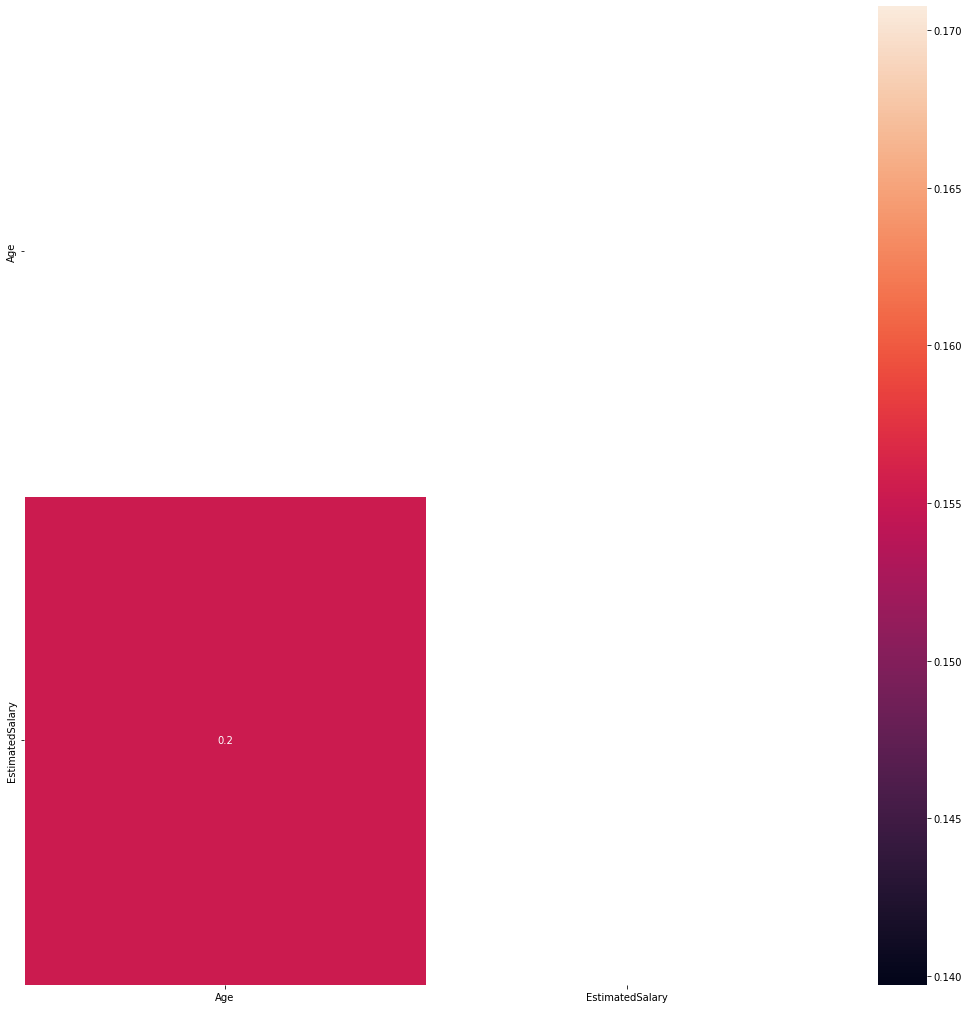

In [12]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

#### Distribution Of Target Variable

<AxesSubplot:xlabel='Purchased', ylabel='count'>

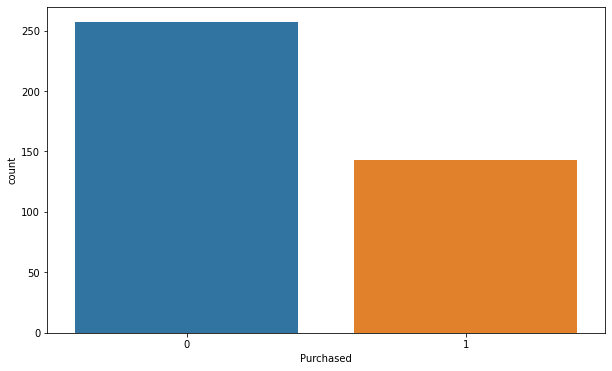

In [13]:
plt.figure(figsize = (10,6))
se.countplot(Y)

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

#### Handling Target Imbalance

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library. 

In [ ]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)

### Model

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). This can be extended to model several classes of events.

#### Model Tuning Parameters

    1. penalty : {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
> Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.

    2. C : float, default=1.0
> Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

    3. tol : float, default=1e-4
> Tolerance for stopping criteria.

    4. solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
> Algorithm to use in the optimization problem.  
For small datasets, ‘<code>liblinear</code>’ is a good choice, whereas ‘<code>sag</code>’ and ‘<code>saga</code>’ are faster for large ones.  
For multiclass problems, only ‘<code>newton-cg</code>’, ‘<code>sag</code>’, ‘<code>saga</code>’ and ‘<code>lbfgs</code>’ handle multinomial loss; ‘<code>liblinear</code>’ is limited to one-versus-rest schemes.
* ‘<code>newton-cg</code>’, ‘<code>lbfgs</code>’, ‘<code>sag</code>’ and ‘<code>saga</code>’ handle L2 or no penalty.
* ‘<code>liblinear</code>’ and ‘<code>saga</code>’ also handle L1 penalty.
* ‘<code>saga</code>’ also supports ‘<code>elasticnet</code>’ penalty.
* ‘<code>liblinear</code>’ does not support setting <code>penalty='none'</code>.

    5. random_state : int, RandomState instance, default=None
> Used when <code>solver</code> == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data.

    6. max_iter : int, default=100
> Maximum number of iterations taken for the solvers to converge.

    7. multi_class : {‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
> If the option chosen is ‘<code>ovr</code>’, then a binary problem is fit for each label. For ‘<code>multinomial</code>’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘<code>multinomial</code>’ is unavailable when <code>solver</code>=’<code>liblinear</code>’. ‘auto’ selects ‘ovr’ if the data is binary, or if <code>solver</code>=’<code>liblinear</code>’, and otherwise selects ‘<code>multinomial</code>’.

    8. verbose : int, default=0
> For the liblinear and lbfgs solvers set verbose to any positive number for verbosity.

    9. n_jobs : int, default=None
> Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the <code>solver</code> is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. <code>None</code> means 1 unless in a joblib.parallel_backend context. <code>-1</code> means using all processors

In [ ]:
# Build Model here
model = LogisticRegression(random_state = 123,n_jobs = -1)
model.fit(x_train, y_train)

LogisticRegression(n_jobs=-1, random_state=123)

#### Model Accuracy

score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 37.50 %



#### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

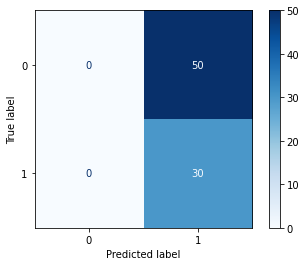

In [ ]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

#### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* **where**:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [ ]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.38      1.00      0.55        30

    accuracy                           0.38        80
   macro avg       0.19      0.50      0.27        80
weighted avg       0.14      0.38      0.20        80



#### Creator: Thilakraj Devadiga , Github: [Profile](https://github.com/Thilakraj1998)
